In [1]:
import StatsBase
using PyPlot
include("./reservoir.jl");

## Define Energy  Function

We'll start with a very simple energy function. We can add complexity later.

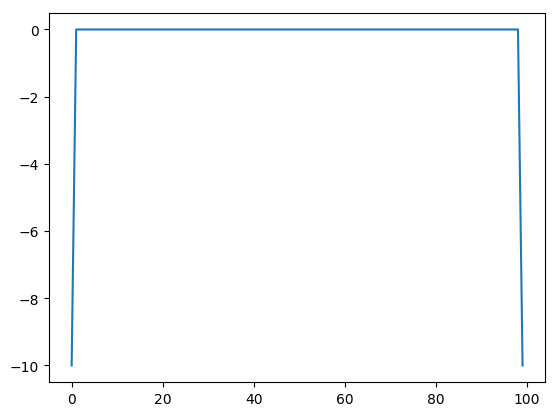

In [2]:
energy = zeros(100)
energy[1] = -10
energy[100] = -10
xmean = sum((1:100) .* exp.(-energy)) / sum(exp.(-energy))
plot(energy);

Run a short simulation with 3 walkers.

In [3]:
wf = runwaterfall([Walker(scale * energy, 1) for scale in [1.0, 0.01, 0.0]], 250000, 10, 200, 100, 300, 4.0e99, false)

Waterfall with 3 walkers

## History

Plot the history of walkers 1 and 3.

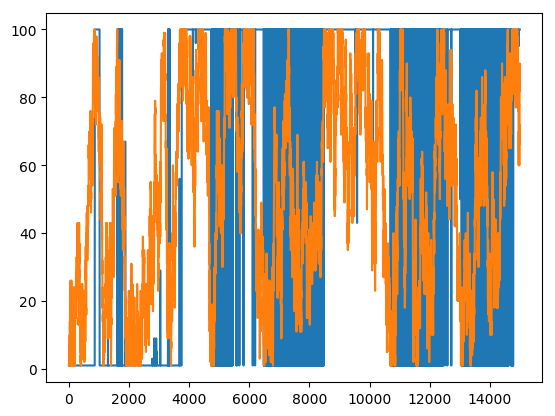

In [4]:
xx = [1, 3]
for i in xx
    plot(wf.history[i, 1:15000])
end

Walker 1 is largely confined to be at 1 or 100, whereas Walker 3 can diffuse throughout the space.

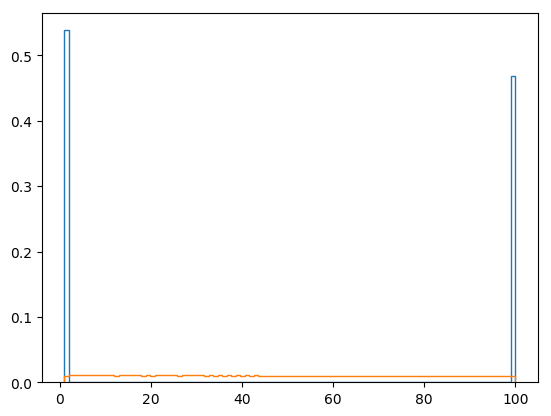

In [5]:
for i in xx
    plt[:hist](wf.history[i, :], bins=100, range=(1, 100), histtype="step", weights=wf.weighthistory[i, :], normed=true);
end

## Convergence to average values

Both Walker 1 and Walker 3 converge to their expected averages, although the convergence behaviour is complex. They very quickly get close but it can then take some time before they reach the true average.

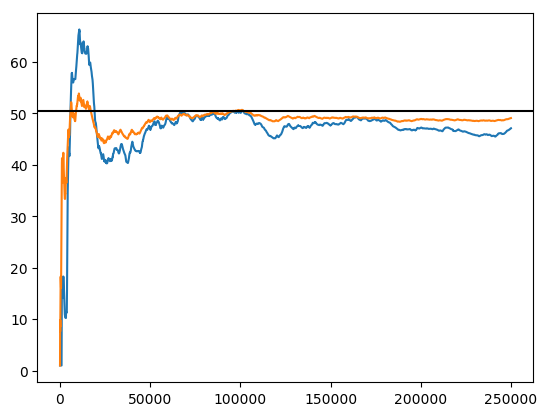

In [6]:
for i in xx
    plot(cumsum(wf.weighthistory[i, :] .* wf.history[i, :]) ./ cumsum(wf.weighthistory[i, :]));
end
axhline(xmean, color="black");

## Autocorrelation

Ultimately, out goal is to minimize the integrated autocorrelation time.

Should we be looking simply at $x$ or should the weight be included somehow?

These curves are very sensitive to the details of how large the reservoirs are.

474.3093951942342


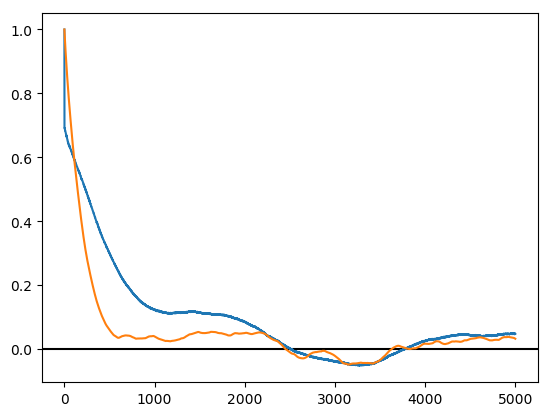

258.6740701237503


In [7]:
plt[:axhline](0, color="black")
for i in xx
    acf = StatsBase.autocor(wf.history[i, :] - xmean, 0:5000, demean=false)
    #acf = StatsBase.autocor(wf.weighthistory[i, :] .* wf.history[i, :], 0:5000, demean=true)
    plot(acf)
    println(sum(acf))
end

## Weights

The plot below shows the weights over time from Walker 1.

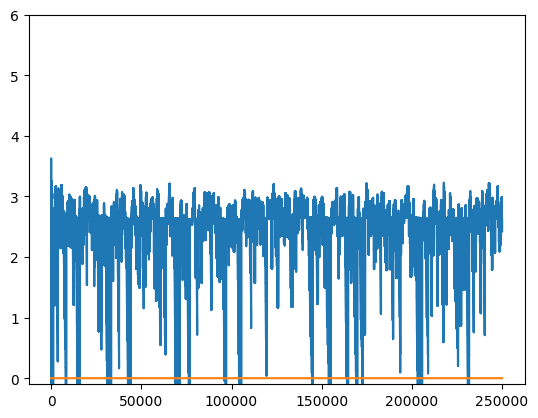

(-0.1, 6)

In [8]:
for i in xx
    plot(log10.(wf.weighthistory[i, :]));
end
plt[:ylim](-0.1, 6)

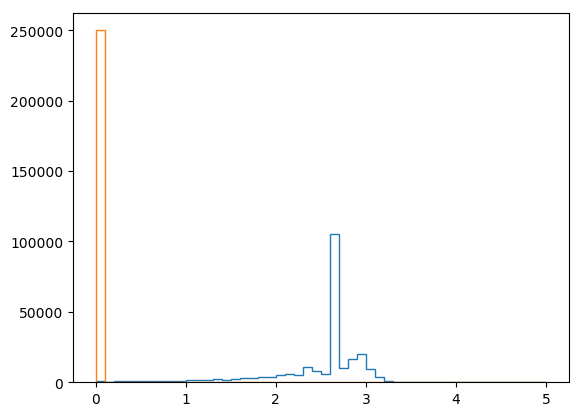

In [9]:
for i in xx
    plt[:hist](log10.(wf.weighthistory[i, :]), bins=50, range=(0, 5), histtype="step");
end

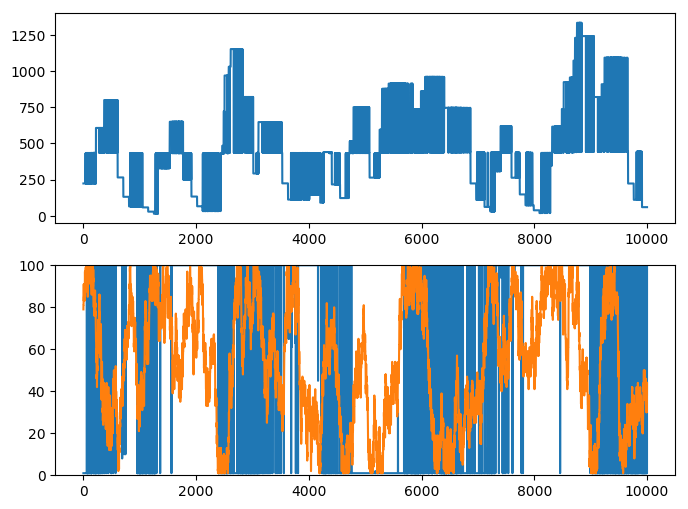

In [10]:
figure(figsize=(8, 6))
plt[:subplot](2, 1, 1)
plot(wf.weighthistory[1, 50_000:60_000])
plt[:subplot](2, 1, 2)
plot(wf.history[1, 50_000:60_000])
plot(wf.history[3, 50_000:60_000])
plt[:ylim](0, 100);

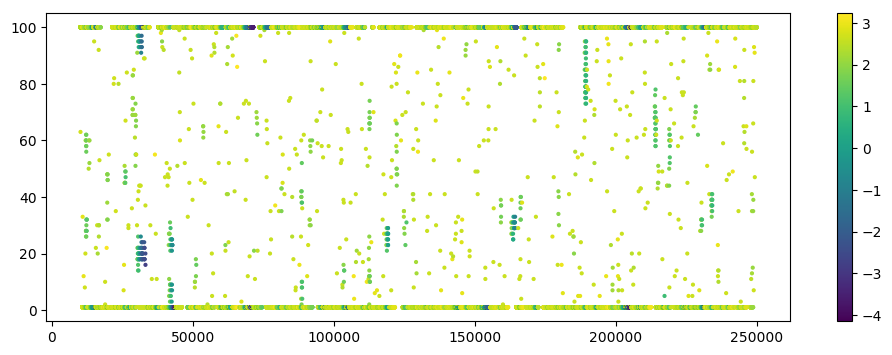

In [11]:
figure(figsize=(12, 4))
plt[:scatter](10000:250_000, wf.history[1, 10000:250_000], s=4,
c=log10.(wf.weighthistory[1, 10000:250_000]))
plt[:colorbar]();

## Trials of different reservior sizes

The code below will try runs with 3 different reservoir sizes: 1000, 100, and 10. The goal is to see how the covergence properties vary depending on the size of the reservoir. Ten runs are completed with each reseroir size to give some idea of convergence.

0.5457414155418637
0.5178324851785067
0.3449597203859458
0.39122288518795156
0.39979219168914365
0.3464227902312572
0.5807483471166817
0.5510151099562862
0.5876141049091865
0.

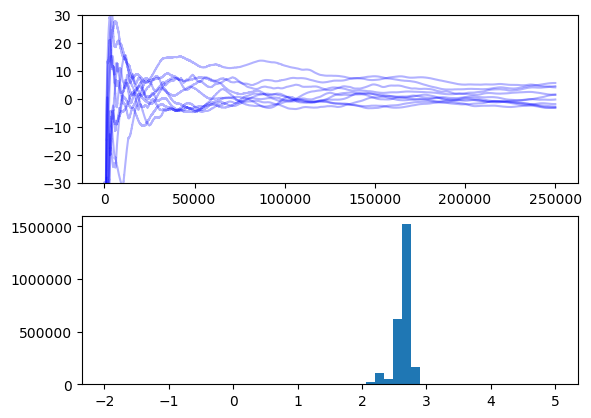

5504742428730223


In [12]:
rep = 1
N = 250000
NTRIAL = 10
mult1 = 1000
mult2 = 100
mult3 = 10
samplesteps = 10
usetoprep = false
x1 = []
x2 = []
x3 = []

for i=1:NTRIAL
    wf = runwaterfall([Walker(scale * energy, 1) for scale in logspace(0, -2, 5)], N, samplesteps,
                      2mult1, 1mult1, 3mult1, 4e99, usetoprep)
    plt[:subplot](2, 1, 1)
    plot(cumsum(wf.weighthistory[rep, :] .* wf.history[rep, :]) ./ cumsum(wf.weighthistory[rep, :]) - xmean,
         color="blue", alpha=0.3);    
        
    append!(x1, wf.weighthistory[rep, :])
    
    println(sum(wf.weighthistory[1, :]) / maximum(wf.weighthistory[1, :]) / size(wf.weighthistory[1, :], 1))
end
plt[:ylim](-30, 30)

plt[:subplot](2, 1, 2)
plt[:hist](log10.(x1), bins=50, range=(-2, 5));

0.2741808335078198
0.3406133978244785
0.31192351419124703
0.2924792756606749
0.2936286912776438
0.3701450731812282
0.3449292347338391
0.3419370065810264
0.3228947942742555
0.

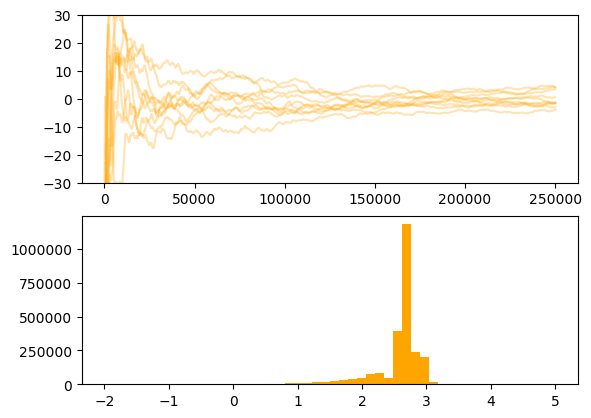

In [13]:
for i=1:NTRIAL
    wf = runwaterfall([Walker(scale * energy, 1) for scale in logspace(0, -2, 5)], N, samplesteps,
                      2mult2, 1mult2, 3mult2, 4e99, usetoprep)
    plt[:subplot](2, 1, 1)
    plot(cumsum(wf.weighthistory[rep, :] .* wf.history[rep, :]) ./ cumsum(wf.weighthistory[rep, :]) - xmean,
         color="orange", alpha=0.3);    
        
    append!(x2, wf.weighthistory[rep, :])

    println(sum(wf.weighthistory[1, :]) / maximum(wf.weighthistory[1, :]) / size(wf.weighthistory[1, :], 1))
end
plt[:ylim](-30, 30)

plt[:subplot](2, 1, 2)
plt[:hist](log10.(x2), bins=50, range=(-2, 5), color="orange");

0.10762293484020174
0.11244770964873187
0.1129872430191776
0.10912507399537574
0.11366128491447197
0.10250776335246267
0.11190329345577384
0.11248522634058267
0.10279196672177007
0.

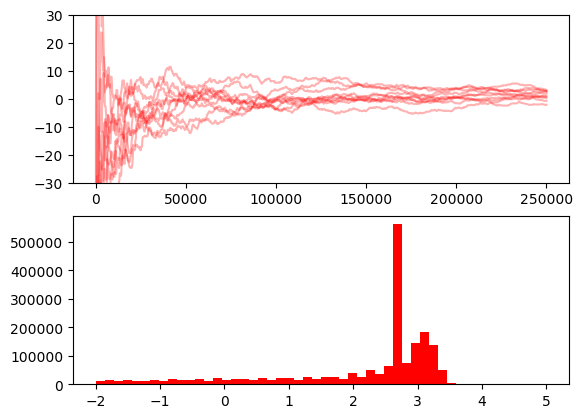

10459345196315706


In [14]:
for i=1:NTRIAL
    wf = runwaterfall([Walker(scale * energy, 1) for scale in logspace(0, -2, 5)], N, samplesteps,
                      2mult3, 1mult3, 3mult3, 4e99, usetoprep)
    plt[:subplot](2, 1, 1)
    plot(cumsum(wf.weighthistory[rep, :] .* wf.history[rep, :]) ./ cumsum(wf.weighthistory[rep, :]) - xmean,
         color="red", alpha=0.3);    
        
    append!(x3, wf.weighthistory[rep, :])

    println(sum(wf.weighthistory[1, :]) / maximum(wf.weighthistory[1, :]) / size(wf.weighthistory[1, :], 1))
end
plt[:ylim](-30, 30)

plt[:subplot](2, 1, 2)
plt[:hist](log10.(x3), bins=50, range=(-2, 5), color="red");